In [3]:
# Question: Power Transformation (Box-Cox) Method
# Description: Use Box-Cox transformation to stabilize variance and make the data more normal.




Optimal lambda value: 0.2462


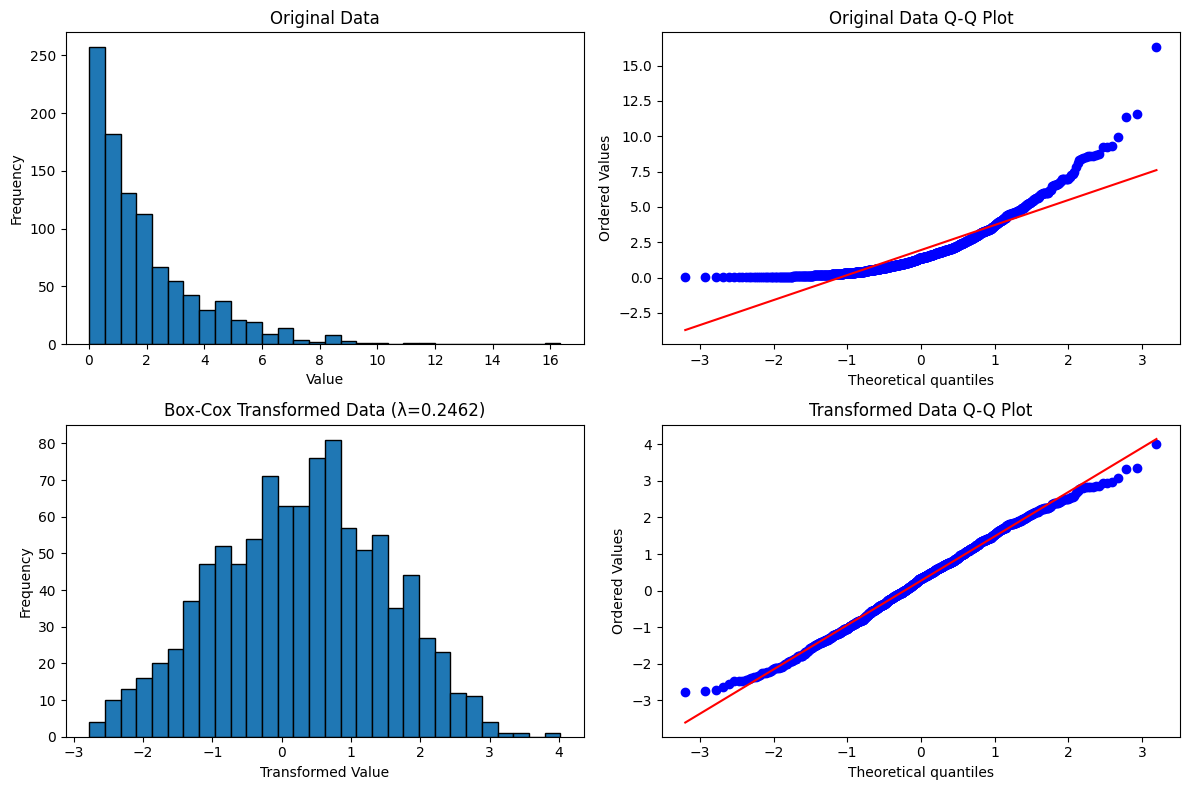

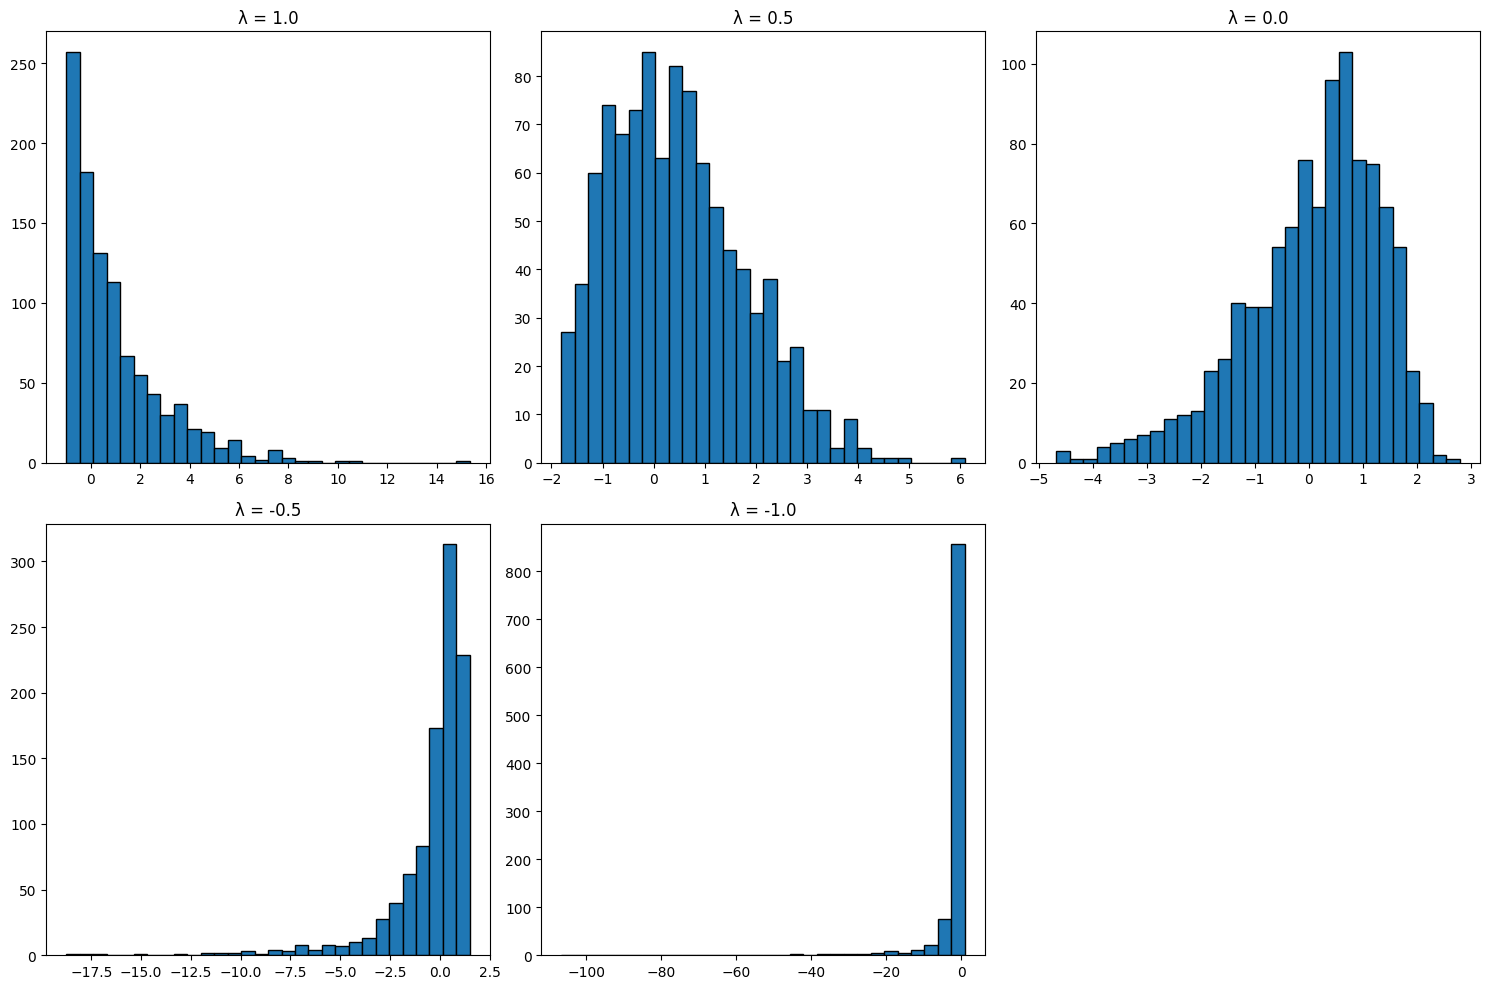


Comparison of Statistics Before and After Transformation:
                    Original  Transformed
Mean                1.945012     0.268812
Median              1.373565     0.330140
Standard Deviation  1.944047     1.211764
Skewness            1.865034    -0.055252
Kurtosis            5.217828    -0.471640


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
np.random.seed(42)
data = np.random.exponential(scale=2.0, size=1000)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(data, bins=30, edgecolor='black')
plt.title('Original Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
stats.probplot(data, plot=plt)
plt.title('Original Data Q-Q Plot')
fitted_data, fitted_lambda = stats.boxcox(data)
print(f"Optimal lambda value: {fitted_lambda:.4f}")
plt.subplot(2, 2, 3)
plt.hist(fitted_data, bins=30, edgecolor='black')
plt.title(f'Box-Cox Transformed Data (λ={fitted_lambda:.4f})')
plt.xlabel('Transformed Value')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
stats.probplot(fitted_data, plot=plt)
plt.title('Transformed Data Q-Q Plot')
plt.tight_layout()
plt.show()
def box_cox_transform(x, lambda_val):
    if lambda_val == 0:
        return np.log(x)
    else:
        return (x**lambda_val - 1) / lambda_val
lambda_values = [1.0, 0.5, 0.0, -0.5, -1.0]
plt.figure(figsize=(15, 10))
for i, lambda_val in enumerate(lambda_values):
    try:
        transformed = box_cox_transform(data, lambda_val)
        plt.subplot(2, 3, i+1)
        plt.hist(transformed, bins=30, edgecolor='black')
        plt.title(f'λ = {lambda_val}')
        if np.isinf(transformed).any() or np.isnan(transformed).any():
            plt.text(0.5, 0.5, "Contains Inf or NaN values", 
                    horizontalalignment='center', verticalalignment='center',
                    transform=plt.gca().transAxes)
    except:
        plt.subplot(2, 3, i+1)
        plt.text(0.5, 0.5, "Transformation failed", 
                horizontalalignment='center', verticalalignment='center',
                transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()
original_stats = pd.DataFrame({
    'Original': [np.mean(data), np.median(data), np.std(data), 
                stats.skew(data), stats.kurtosis(data)]
}, index=['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'])
transformed_stats = pd.DataFrame({
    'Transformed': [np.mean(fitted_data), np.median(fitted_data), np.std(fitted_data), 
                   stats.skew(fitted_data), stats.kurtosis(fitted_data)]
}, index=['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'])
comparison = pd.concat([original_stats, transformed_stats], axis=1)
print("\nComparison of Statistics Before and After Transformation:")
print(comparison)